#References

*   Course: Machine Learning. Victor Adolfo Romero
*   Introduction to Machine Learning with Python: A Guide for Data Scientists 1st Edition. Andreas Müller, Sarah Guido
*  https://machinelearningmastery.com/standard-machine-learning-datasets/
*  https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee
*  https://archive.ics.uci.edu/ml/datasets/Wine+Quality
*  https://www.geeksforgeeks.org/python-pandas-dataframe-duplicated/
*  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
*  https://doi.org/10.1016/0002-9149(89)90524-9

* https://towardsdatascience.com/heart-disease-prediction-73468d630cfc
*  https://www.geeksforgeeks.org/difference-between-shallow-copy-vs-deep-copy-in-pandas-dataframes/#:~:text=A%20deep%20copy%20of%20a,objects%20found%20in%20the%20original.

* https://datagy.io/sklearn-one-hot-encode/

* https://medium.com/swlh/python-for-datascientist-quick-backup-for-everything-6d201a7e935d


In [ ]:
# Installing required libraries
#!pip install joblib==1.1.0  # Installing joblib library with version 1.1.0
#!pip install mglearn  # Installing mglearn library for machine learning related examples


In [ ]:
# Importing necessary libraries
import numpy as np  # Importing numpy library for numerical computing
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization
import pandas as pd  # Importing pandas library for data manipulation and analysis
import requests  # Importing requests library for making HTTP requests

import seaborn as sns # Import the seaborn library for data visualization
import copy as cp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statistics as st

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.datasets import make_classification

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer


%matplotlib inline

#The Dataset

We will use the Heart Disease Data Set, from the UCI Machine Learning Repository.
It's available at:
https://archive.ics.uci.edu/ml/datasets/heart+Disease


In [ ]:
# Define the URL from which to retrieve data
url_info = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names"

# Send a GET request to the URL and retrieve the response as text
df_info = requests.get(url_info).text


#Exploratory Data Analysis (EDA) and Pre-processing

Let's read the information available for the data

In [ ]:
# Print the value of 'df_info' variable
print(df_info)

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

According to this, we expect four datasets:
*  Cleveland
*  Hungary
*  Switzerland
*  Long Beach

With 14 columns, which should be:

1 - age : age in years

2 - sex : sex (1 = male; 0 = female)

3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic

4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5 - chol : chol: serum cholestoral in mg/dl

6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8 - thalach : thalach: maximum heart rate achieved

9 - exang : exang: exercise induced angina (1 = yes; 0 = no)

10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest

11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

12 - ca : ca: number of major vessels (0-3) colored by flourosopy

13 - thal :  thallium scintigraphic defect 3 = normal; 6 = fixed defect; 7 = reversable defect  (to understand this one, go to the original paper at https://doi.org/10.1016/0002-9149(89)90524-9)

14 - num : The "goal" field refers to the presence of heart disease
     in the patient.  It is integer valued from 0 (no presence) to 4.
     Experiments with the Cleveland database have concentrated on simply
     attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  

The 14th column is the predicted attribute

In [ ]:
# Define column names for the dataframe
df_names = [
    "age", "sex", "chest_pain_type", "resting_blood_pressure",
    "cholesterol", "fasting_blood_sugar", "resting_ecg",
    "maximum_heart_rate", "exercise_induced_angina",
    "ST_depression_exercise", "slope_exercise_ST",
    "major_vessels_colored", "thallium_scintigraphic_defect",
    "angiographic_disease_status"
]

# Define URLs for data sources
url_data1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
url_data2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
url_data3 = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
url_data4 = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"

# Read data from URLs into separate dataframes with specified column names
df1 = pd.read_csv(url_data1, delimiter=",", names=df_names)
df2 = pd.read_csv(url_data2, delimiter=",", names=df_names)
df3 = pd.read_csv(url_data3, delimiter=",", names=df_names)
df4 = pd.read_csv(url_data4, delimiter=",", names=df_names)

# Display the dataframes
display(df1)
display(df2)
display(df3)
display(df4)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,angiographic_disease_status
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,angiographic_disease_status
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,angiographic_disease_status
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


It might be advisable to use another column to indicate where the dataset comes from (Cleveland, Hungary, Switzerland)



In [ ]:
# Add a 'location' column to each dataframe to indicate the data source
df1['location'] = 0  # Cleveland
df2['location'] = 1  # Hungary
df3['location'] = 2  # Switzerland
df4['location'] = 3  # Long Beach



Let's see the data

In [ ]:
# Concatenate all dataframes into a single dataframe
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Set pandas display options for better visibility of data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Rename columns in the dataframe
new_cols = ["age", "sex", "chest_pain_type", "resting_blood_pressure",
            "cholesterol", "fasting_blood_sugar", "resting_ecg",
            "maximum_heart_rate", "exercise_induced_angina",
            "ST_depression_exercise", "slope_exercise_ST",
            "major_vessels_colored", "thallium_scintigraphic_defect",
            "location", "angiographic_disease_status"]
df_names = new_cols
df = df[new_cols]

# Display the updated dataframe
display(df)


<ipython-input-7-47979f267c0c>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,0,1


Let's summarize the data statistics

In [ ]:
feature_description="""
1 - age : age in years
2 - sex : sex (1 = male; 0 = female)
3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5 - chol : chol: serum cholestoral in mg/dl
6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8 - thalach : thalach: maximum heart rate achieved
9 - exang : exang: exercise induced angina (1 = yes; 0 = no)
10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest
11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12 - ca : ca: number of major vessels (0-3) colored by flourosopy
13 - thal :  thallium scintigraphic defect 3 = normal; 6 = fixed defect; 7 = reversable defect  (to understand this one, go to the original paper at https://doi.org/10.1016/0002-9149(89)90524-9)
14 - location: where was recorded the data
15 - num : The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4.
     Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
"""

print(feature_description)


1 - age : age in years
2 - sex : sex (1 = male; 0 = female)
3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5 - chol : chol: serum cholestoral in mg/dl
6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8 - thalach : thalach: maximum heart rate achieved
9 - exang : exang: exercise induced angina (1 = yes; 0 = no)
10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest
11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12 - ca : ca:

In [ ]:
# Generate basic statistics for the numerical columns in the dataframe
df.describe()



,age,sex,chest_pain_type,location,angiographic_disease_status
count,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,1.239130,0.995652
std,9.424685,0.408148,0.930969,1.129962,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,1.000000,1.000000
75%,60.000000,1.000000,4.000000,2.000000,2.000000
max,77.000000,1.000000,4.000000,3.000000,4.000000


Apparently... statistics could not be computed for all columns...

df.info() returns us information about the data type, non-null values and memory usage.

In [ ]:
# Check for missing values in the dataframe
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholesterol                      0
fasting_blood_sugar              0
resting_ecg                      0
maximum_heart_rate               0
exercise_induced_angina          0
ST_depression_exercise           0
slope_exercise_ST                0
major_vessels_colored            0
thallium_scintigraphic_defect    0
location                         0
angiographic_disease_status      0
dtype: int64

In [ ]:
# Display information about the dataframe including column data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            920 non-null    float64
 1   sex                            920 non-null    float64
 2   chest_pain_type                920 non-null    float64
 3   resting_blood_pressure         920 non-null    object 
 4   cholesterol                    920 non-null    object 
 5   fasting_blood_sugar            920 non-null    object 
 6   resting_ecg                    920 non-null    object 
 7   maximum_heart_rate             920 non-null    object 
 8   exercise_induced_angina        920 non-null    object 
 9   ST_depression_exercise         920 non-null    object 
 10  slope_exercise_ST              920 non-null    object 
 11  major_vessels_colored          920 non-null    object 
 12  thallium_scintigraphic_defect  920 non-null    obj

There is something important: despite saying there is no null values, many attributes are labeled as type "object" this means they don't have numeric values (and they should). If you check the dataframe, you can see many "?" symbols denoting missing data.

Let's check each column to look for strange symbols...

In [ ]:
# Print unique values in each column of the dataframe
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

age : [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 28. 30. 31. 32. 33. 36. 72. 73. 75.]
sex : [1. 0.]
chest_pain_type : [1. 4. 3. 2.]
resting_blood_pressure : [145.0 160.0 120.0 130.0 140.0 172.0 150.0 110.0 132.0 117.0 135.0 112.0
 105.0 124.0 125.0 142.0 128.0 170.0 155.0 104.0 180.0 138.0 108.0 134.0
 122.0 115.0 118.0 100.0 200.0 94.0 165.0 102.0 152.0 101.0 126.0 174.0
 148.0 178.0 158.0 192.0 129.0 144.0 123.0 136.0 146.0 106.0 156.0 154.0
 114.0 164.0 '130' '120' '140' '170' '100' '105' '110' '125' '150' '98'
 '112' '145' '190' '160' '115' '142' '180' '132' '135' '?' '108' '124'
 '113' '122' '92' '118' '106' '200' '138' '136' '128' '155' '95' '165'
 '80' '185' '126' '152' '116' '0' '144' '154' '104' '134' '178' '146'
 '158' '102' '96' '172' '156' '114' '127']
cholesterol : [233.0 286.0 229.0 250.0 204.0 236.0 268.0 354.0 254.0 203.0 192.0 294.0
 256.0 263.0 1

##Missing Data

In many columns we find "?" marking missing data. Let's replace those with nan

In [ ]:
# Replace '?' with NaN in the dataframe
for col in df.columns:
    df[col].replace({'?': np.nan}, inplace=True)

# Check for missing values in the dataframe after replacing '?'
df.isnull().sum()

age                              0  
sex                              0  
chest_pain_type                  0  
resting_blood_pressure           59 
cholesterol                      30 
fasting_blood_sugar              90 
resting_ecg                      2  
maximum_heart_rate               55 
exercise_induced_angina          55 
ST_depression_exercise           62 
slope_exercise_ST                309
major_vessels_colored            611
thallium_scintigraphic_defect    486
location                         0  
angiographic_disease_status      0  
dtype: int64

Now we do find null values. A lot, actually. Let's visualize where they are:

<Axes: >

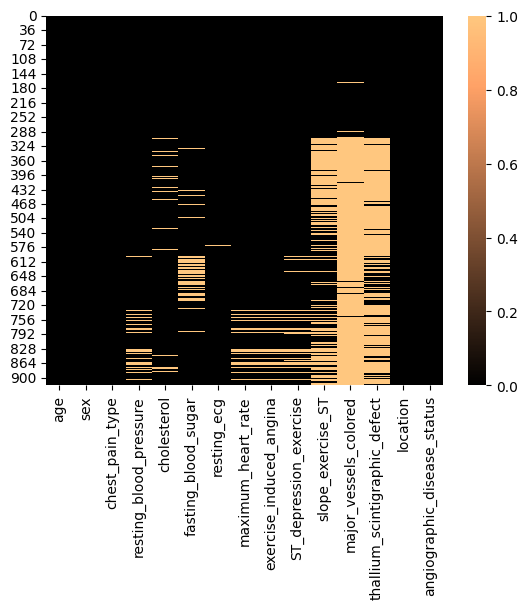

In [ ]:
sns.heatmap(df.isnull(), cmap='copper', cbar=True) # Create a heatmap of missing values in the dataframe using seaborn

Most of the missing data are in rows from 300 on. That means that they correspond mostly to the hungarian, swiss and long beach datasets. 

In [ ]:
display(df)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,0,1


Looks better now BUT!!!!! there was something strange going on with numbers that had quotation marks... 

In [ ]:
df.info() # Display information about the dataframe, including column names, data types, and number of non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            920 non-null    float64
 1   sex                            920 non-null    float64
 2   chest_pain_type                920 non-null    float64
 3   resting_blood_pressure         861 non-null    object 
 4   cholesterol                    890 non-null    object 
 5   fasting_blood_sugar            830 non-null    object 
 6   resting_ecg                    918 non-null    object 
 7   maximum_heart_rate             865 non-null    object 
 8   exercise_induced_angina        865 non-null    object 
 9   ST_depression_exercise         858 non-null    object 
 10  slope_exercise_ST              611 non-null    object 
 11  major_vessels_colored          309 non-null    object 
 12  thallium_scintigraphic_defect  434 non-null    obj

Still, many columns appear as dtype "object" all of them should be float, except location

In [ ]:
for col in df.columns[:13]: # Loop through the first 13 columns in the dataframe
    df[col] = df[col].astype(float) # Convert the data type of each column to float

df.info() # Display updated information about the dataframe after converting column data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            920 non-null    float64
 1   sex                            920 non-null    float64
 2   chest_pain_type                920 non-null    float64
 3   resting_blood_pressure         861 non-null    float64
 4   cholesterol                    890 non-null    float64
 5   fasting_blood_sugar            830 non-null    float64
 6   resting_ecg                    918 non-null    float64
 7   maximum_heart_rate             865 non-null    float64
 8   exercise_induced_angina        865 non-null    float64
 9   ST_depression_exercise         858 non-null    float64
 10  slope_exercise_ST              611 non-null    float64
 11  major_vessels_colored          309 non-null    float64
 12  thallium_scintigraphic_defect  434 non-null    flo

In [ ]:
df.describe() # Generate descriptive statistics of the dataframe, including measures of central tendency, dispersion, and shape of the distribution

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,1.239130,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.129962,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,3.000000,4.000000


There are also some strange values in "cholesterol" and "resting blood pressure". These values shouldn't be zero...
Let's find out how many zero values do we have there

In [ ]:
nm = (df[['cholesterol']] == 0).sum() # Count the number of occurrences of 0 in the 'cholesterol' column and store it in the variable nm
print(nm) # Print the count of occurrences of 0 in the 'cholesterol' column

nm = (df[['resting_blood_pressure']] == 0).sum() # Count the number of occurrences of 0 in the 'resting_blood_pressure' column and store it in the variable nm
print(nm) # Print the count of occurrences of 0 in the 'resting_blood_pressure' column


cholesterol    172
dtype: int64
resting_blood_pressure    1
dtype: int64


(array([  1.,   0.,   0.,   0.,  12., 149., 388., 218.,  73.,  20.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

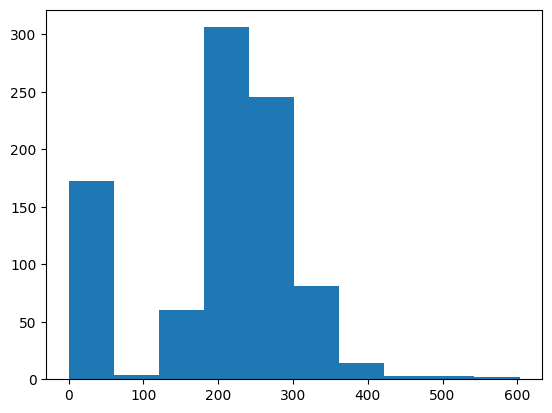

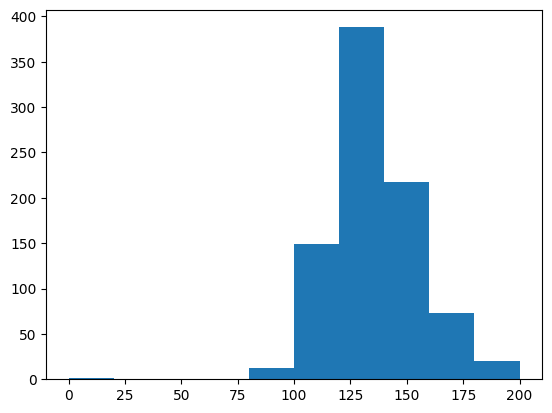

In [ ]:
plt.hist(df['cholesterol']) # Create a histogram of the 'cholesterol' column using matplotlib
plt.figure() # Create a new figure for the next plot
plt.hist(df['resting_blood_pressure']) # Create a histogram of the 'resting_blood_pressure' column using matplotlib


So many zero values in "cholesterol". This is most likely a representation of missing data, so let´s replace them with nan

In [ ]:
df['cholesterol'] = df['cholesterol'].replace(0, np.nan) # Replace all occurrences of 0 in the 'cholesterol' column with NaN (Not a Number)
df['resting_blood_pressure'] = df['resting_blood_pressure'].replace(0, np.nan) # Replace all occurrences of 0 in the 'resting_blood_pressure' column with NaN (Not a Number)

print(df.isnull().sum()) # Print the count of missing values in each column of the dataframe


age                              0  
sex                              0  
chest_pain_type                  0  
resting_blood_pressure           60 
cholesterol                      202
fasting_blood_sugar              90 
resting_ecg                      2  
maximum_heart_rate               55 
exercise_induced_angina          55 
ST_depression_exercise           62 
slope_exercise_ST                309
major_vessels_colored            611
thallium_scintigraphic_defect    486
location                         0  
angiographic_disease_status      0  
dtype: int64


And now... let's just drop all the NaN values (we will see some other ways to handle them afterwards)

In [ ]:
df_full_clean = df.copy(deep=True) # Create a deep copy of the dataframe and store it in a new variable 'df_full_clean'
print(df_full_clean.shape) # Print the shape (dimensions) of the copied dataframe


(920, 15)


In [ ]:
df.dropna(inplace=True) # Drop rows with missing values from the dataframe
print(df.shape) # Print the updated shape of the dataframe after removing rows with missing values


(299, 15)


In [ ]:
df.describe() # Generate descriptive statistics of the dataframe with missing rows removed


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.013378,0.946488
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,0.182695,1.230409
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,0.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,3.000000,4.000000


Let's check if there are any duplicates

In [ ]:
df[df.duplicated(keep=False)] # Select and print rows in the dataframe that are duplicated, keeping all occurrences of duplicated rows


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status


Apparently there are no duplicated samples

Let's see the feature distributions

In [ ]:
print(feature_description) # Print the value of the variable 'feature_description'



1 - age : age in years
2 - sex : sex (1 = male; 0 = female)
3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5 - chol : chol: serum cholestoral in mg/dl
6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8 - thalach : thalach: maximum heart rate achieved
9 - exang : exang: exercise induced angina (1 = yes; 0 = no)
10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest
11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12 - ca : ca:

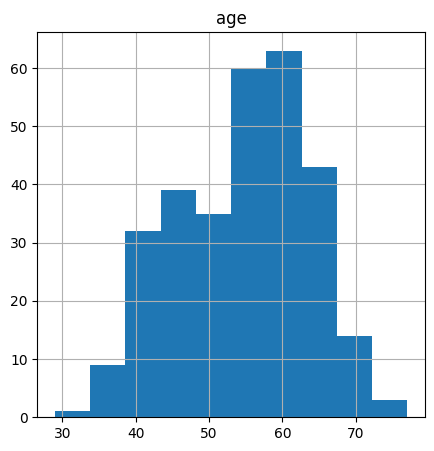

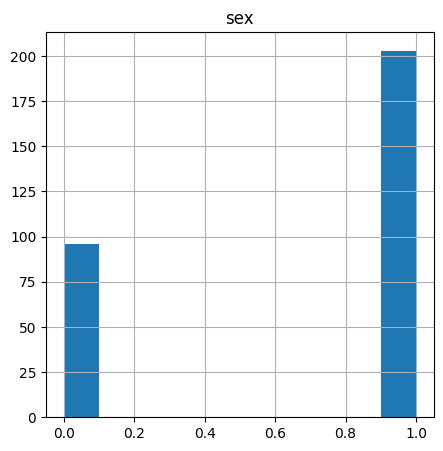

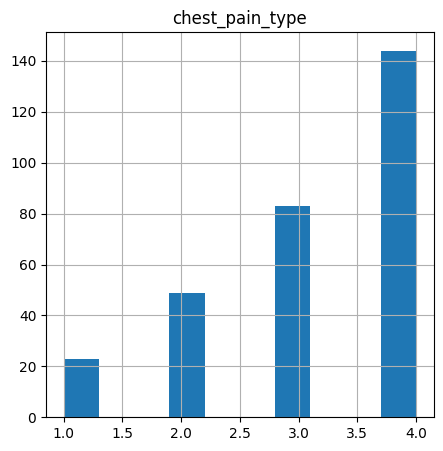

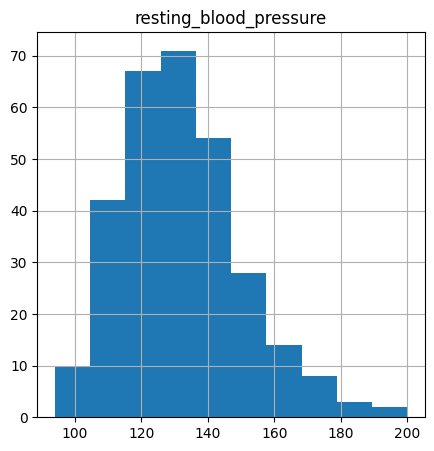

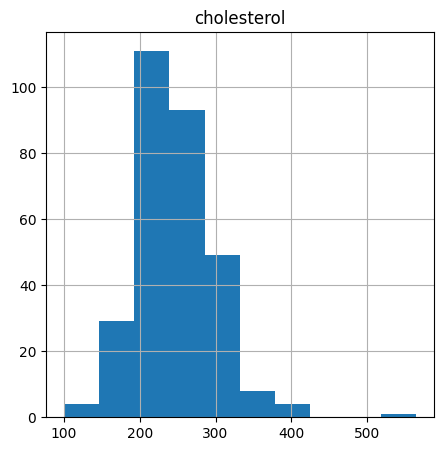

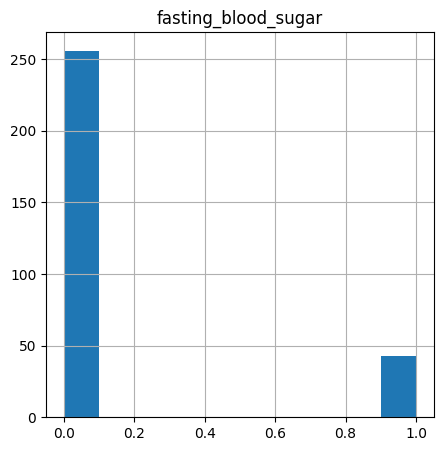

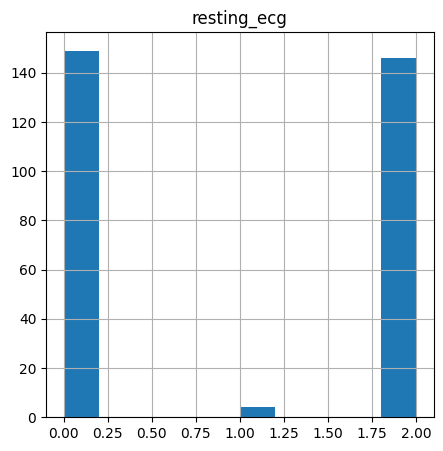

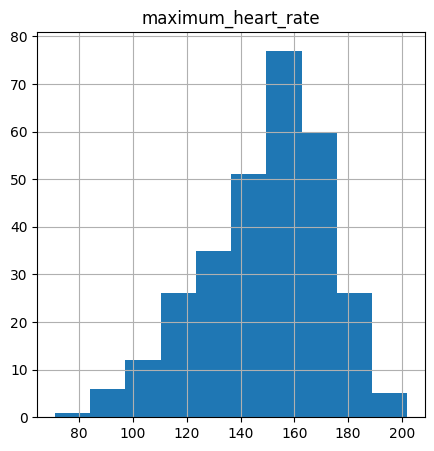

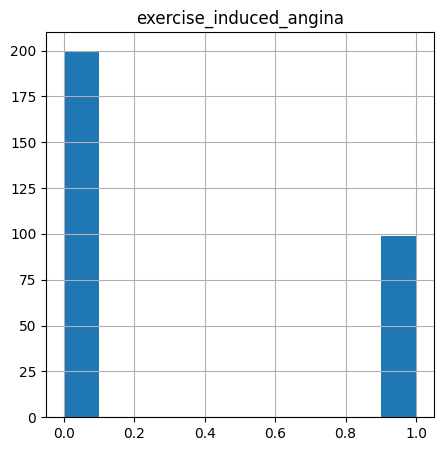

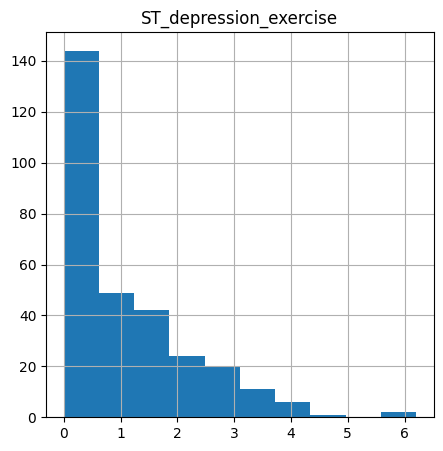

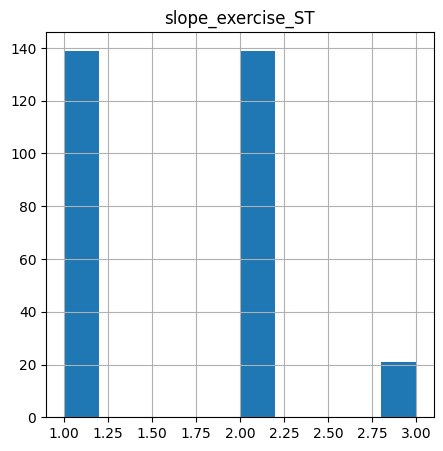

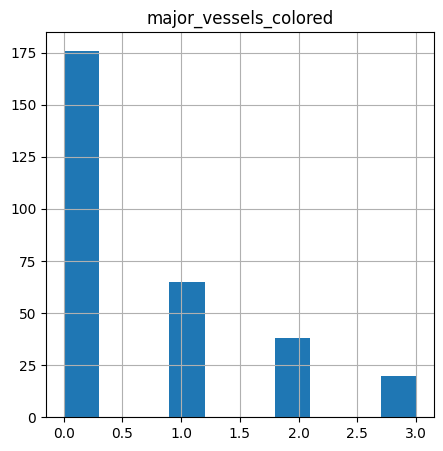

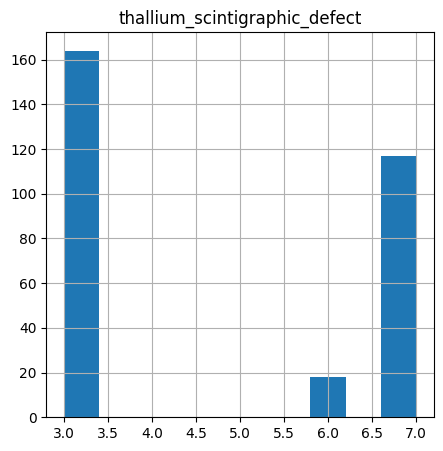

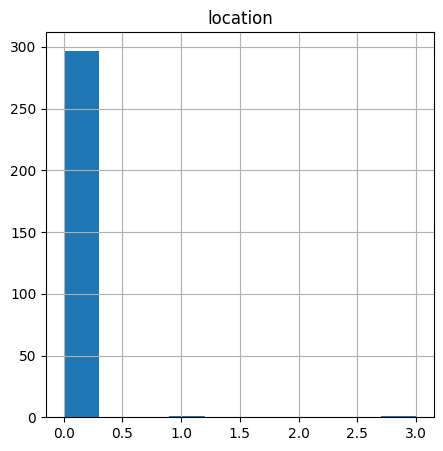

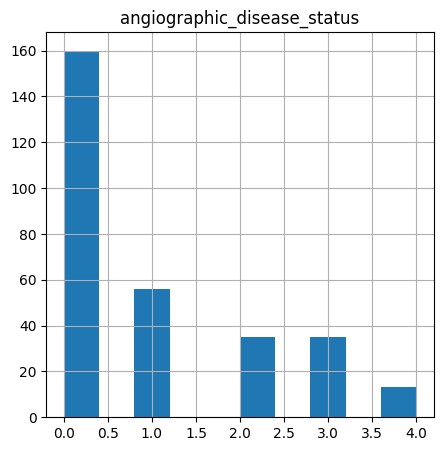

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5] # Set the default figure size for matplotlib plots to 5x5 inches
for x in df_names: # Loop through the values in the variable 'df_names'
    plt.figure() # Create a new figure for each plot
    plt.title(x) # Set the title of the plot to the current value of 'x'
    df[x].hist() # Create a histogram of the column specified by the current value of 'x' using matplotlib

In [ ]:
# Generate a pairplot for the dataframe 'df' using seaborn
#sns.pairplot(df)


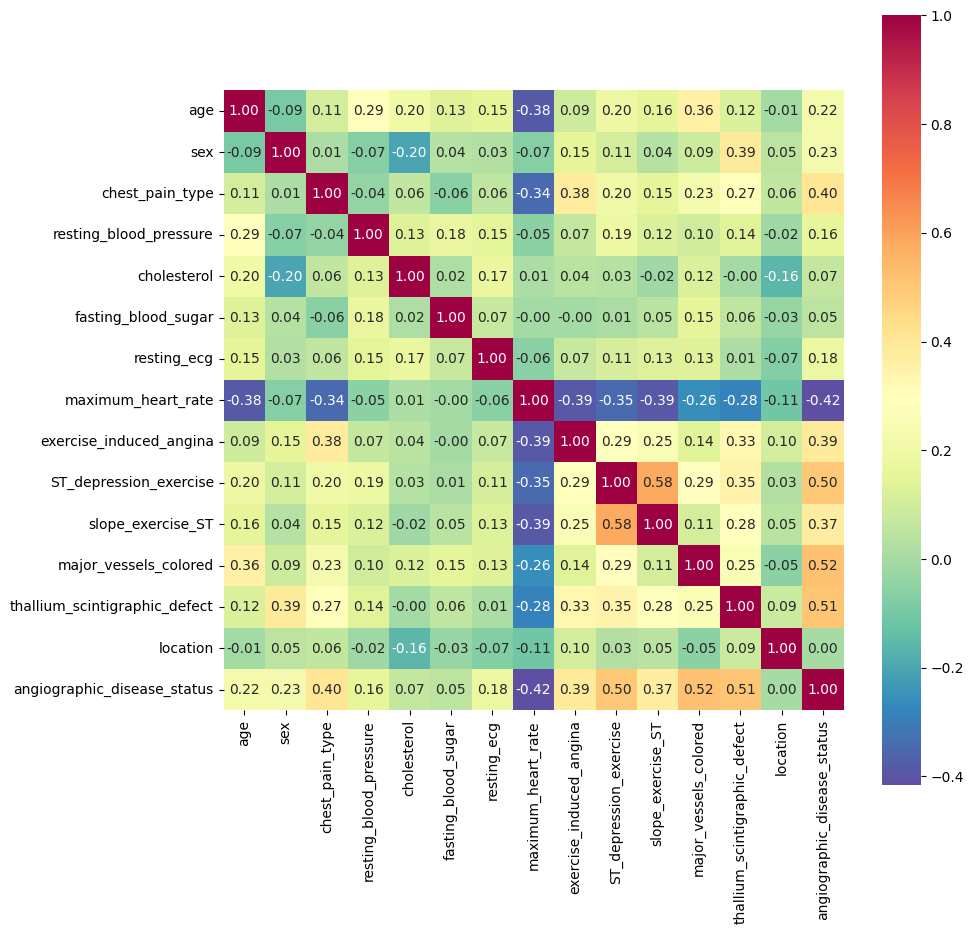

In [ ]:
# Set the figure size for the plot to [10, 10]
plt.rcParams['figure.figsize'] = [10, 10]

# Compute the correlation matrix for the dataframe 'df'
corrmat = df.corr()

# Create a heatmap of the correlation matrix using seaborn
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")

# Display the plot
plt.show()


In [ ]:
# Print the value counts of the 'angiographic_disease_status' column in the dataframe 'df'
print(df['angiographic_disease_status'].value_counts())

# Create a deep copy of the dataframe 'df' and store it in 'df_full_clean'
df_full_clean=df.copy(deep=True)


0    160
1    56 
2    35 
3    35 
4    13 
Name: angiographic_disease_status, dtype: int64


This count of different values in the target column (angiographic disease status) let us see that there is imbalance between the different classes. We will address this  later.

In [ ]:
# Create a shallow copy of the dataframe 'df_full_clean' and store it in 'df'
# Drop rows with missing values from the dataframe 'df'
df=df_full_clean.copy(deep=True)
df.dropna(inplace=True)
df.head(10)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,0,1


In [ ]:
# Create a deep copy of the values of the dataframe 'df' excluding the 'angiographic_disease_status' column
# Store it in 'X'
X = cp.deepcopy(df.drop(['angiographic_disease_status'],axis=1).values)

# Create a deep copy of the 'angiographic_disease_status' column in the dataframe 'df' and store it in 'Y_mc'
Y_mc=cp.deepcopy(df['angiographic_disease_status'].values)

# Create a deep copy of the 'angiographic_disease_status' column in the dataframe 'df' and store it in 'Y_bin'
Y_bin=cp.deepcopy(df['angiographic_disease_status'].values)

# Convert values greater than 0 in 'Y_bin' to 1
Y_bin[Y_bin>0]=1

# Print the values of 'X', 'Y_mc', and 'Y_bin'
print(X)
print(Y_mc)
print(Y_bin)

# Display the first few rows of the dataframe 'df'
df.head()

[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  0.]
 [67.  1.  4. ...  2.  7.  0.]
 ...
 [57.  0.  2. ...  1.  3.  0.]
 [47.  1.  4. ...  0.  7.  1.]
 [56.  1.  4. ...  0.  7.  3.]]
[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1 1
 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0 0
 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1 0 0
 2 1 2 0 3 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0 0 3 1
 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0 1 0 3
 0 0 4 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 1 0 2 2 1 0 3 1 1 2 3
 1 1 1]
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [ ]:

# Split the data into training and test sets using train_test_split
# Store the training and test data for 'X', 'Y_mc', and 'Y_bin' separately
# Set the random state to 42 and use 'Y_mc' for stratified sampling
X_train, X_test, y_train_mc, y_test_mc, y_train_bin, y_test_bin = train_test_split(X, Y_mc, Y_bin, random_state=42, stratify=Y_mc)

# Create a logistic regression model and fit it to the training data
logreg = LogisticRegression().fit(X_train, y_train_mc)

# Print the training set score and test set score of the logistic regression model
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_mc)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))

# Print the list of coefficients of the logistic regression model
print("List of Coefficients: ", logreg.coef_)




Training set score: 0.629
Test set score: 0.573
List of Coefficients:  [[ 8.48552761e-03 -9.38068663e-02 -1.82755137e-01 -4.97133233e-03
  -2.20231438e-03  1.12563243e-02 -9.16447983e-02  3.92371932e-02
  -9.07081225e-02 -2.34474618e-01 -9.43161667e-02 -1.92565287e-01
  -4.86950584e-01 -7.65985201e-03]
 [-3.31484236e-02  2.97287500e-02  2.96604359e-02  1.19172042e-02
  -7.23188782e-04 -2.93973212e-02  2.82430294e-02  5.17203816e-03
   4.17321216e-02 -2.29976639e-02 -8.53482612e-03 -2.64771910e-02
   5.84234082e-02  1.47761285e-02]
 [-9.70292356e-04  3.38633316e-02  6.40723078e-02  4.57412181e-03
   6.71254726e-03  6.26757804e-03 -3.93540659e-03 -2.49388643e-02
   1.56076834e-02  8.22913300e-02  4.59204380e-02  5.63702867e-02
   1.30084992e-01 -1.54117090e-03]
 [-6.41959786e-02  2.40333795e-02  8.18949044e-02  2.70307422e-02
   4.04429529e-04  1.63324593e-02  3.43379899e-02 -1.47257692e-02
   3.78344274e-02  9.29573585e-02  3.31747652e-02  8.91694750e-02
   2.45252772e-01 -3.72532575e-0

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**¿Should we simplify our problem?**

Performance is not good if we target the multiclass problem... let's try to make it just a binary classification, and see what happens:

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train_bin)
# Print training set score
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_bin)))
# Print test set score
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_bin)))
# Print list of coefficients
print("List of Coefficients: ", logreg.coef_)

Training set score: 0.853
Test set score: 0.867
List of Coefficients:  [[-0.03206657  0.43827047  0.37621836  0.01814442  0.00144807 -0.21076041
   0.3146099  -0.04013057  0.5100566   0.44560474  0.10840478  0.94590648
   0.38703518  0.0578442 ]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From 0.57 to 0.85, That's a big difference!

Let´s go back to the missing data... ¿would it be better if we tried another approach?.
We will try the following approaches:
*  Impute using the mean
*  Impute using the median
*  Impute using the mode

However, let´s have in mind two things:

1- Some features are categorical. Therefore they can't have values different from those specified.

2- We will have to divide our dataset in training and test before doing the imputation. If we computed mean, median or any other statistic from the full dataset we would be using information from our test set (which is NOT correct)



In [ ]:
# Create a deep copy of df_full_clean DataFrame
df=df_full_clean.copy(deep=True)
# Extract features (X) and target (Y_mc and Y_bin) from DataFrame
X = cp.deepcopy(df.drop(['angiographic_disease_status'],axis=1).values)
Y_mc=cp.deepcopy(df['angiographic_disease_status'].values)
Y_bin=cp.deepcopy(df['angiographic_disease_status'].values)
# Convert Y_bin to binary values (0 or 1)
Y_bin[Y_bin>0]=1

# Print X, Y_mc, and Y_bin
print(X)
print(Y_mc)
print(Y_bin)
# Print head of DataFrame
df.head()

# Split X, Y_mc, and Y_bin into training and test sets
X_train, X_test, y_train_mc, y_test_mc, y_train_bin, y_test_bin = train_test_split(X, Y_mc, Y_bin, random_state=42, stratify=Y_mc)


[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  0.]
 [67.  1.  4. ...  2.  7.  0.]
 ...
 [57.  0.  2. ...  1.  3.  0.]
 [47.  1.  4. ...  0.  7.  1.]
 [56.  1.  4. ...  0.  7.  3.]]
[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1 1
 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0 0
 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1 0 0
 2 1 2 0 3 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0 0 3 1
 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0 1 0 3
 0 0 4 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 1 0 2 2 1 0 3 1 1 2 3
 1 1 1]
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0

Now... What variables (columns) can we replace with the mean or the median?. First, let's check what feature have nans:

In [ ]:
# Print feature description
print(feature_description)


1 - age : age in years
2 - sex : sex (1 = male; 0 = female)
3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5 - chol : chol: serum cholestoral in mg/dl
6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8 - thalach : thalach: maximum heart rate achieved
9 - exang : exang: exercise induced angina (1 = yes; 0 = no)
10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest
11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12 - ca : ca:

In [ ]:
# Print number of NaN values in X_train, X_test, y_train_mc, y_test_mc, y_train_bin, y_test_bin
print(np.sum(np.isnan(X_train),axis=0))
print(np.sum(np.isnan(X_test),axis=0))
print(np.sum(np.isnan(y_train_mc),axis=0))
print(np.sum(np.isnan(y_test_mc),axis=0))
print(np.sum(np.isnan(y_train_bin),axis=0))
print(np.sum(np.isnan(y_test_bin),axis=0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
0
0
0


Remember numpy arrays are zero-indexed.

We have nans in the following columns of the training set:

* resting blood pressure: it's continous, we can replace using median or mean
* cholesterol: it's continous, we can replace using median or mean
* fasting blood sugar: this is categorical, we can use the mode
* restecg: this is categorical, we can use the mode
* maximum heart rate: it's continous, we can replace using median or mean
* exercise induced angina: this is categorical, we can use the mode
* ST depression: it's continous, we can replace using median or mean
* ST slope: this is categorical, we can use the mode
* colored vessels: this is categorical, we can use the mode
* thallium defect: this is categorical, we can use the mode

Also, there is another important aspect: all these values are computed in the training set but should be replaced in the test set as well. However, it might happen that there one column that has nans in the test set but not in the training set (or the other way around). The replace value should still be computed in the training set:


In [ ]:
# Define replace_values for imputing missing values in X_train and X_test
replace_values=[None,
                None,
                None,
                np.nanmedian(X_train[:,3]), # Resting blood pressure: it's continuous
                np.nanmedian(X_train[:,4]), # Cholesterol: it's continuous
                st.mode(X_train[:,5]), # Fasting blood sugar: this is categorical
                st.mode(X_train[:,6]), # Restecg: this is categorical
                np.nanmedian(X_train[:,7]), # Maximum heart rate: it's continuous
                st.mode(X_train[:,8]), # Exercise induced angina: this is categorical
                np.nanmedian(X_train[:,9]), # ST depression: it's continuous
                st.mode(X_train[:,10]), # ST slope: this is categorical
                st.mode(X_train[:,11]), # Colored vessels: this is categorical
                st.mode(X_train[:,12]), # Thallium defect: this is categorical
                None
                ]

# Print replace_values
print(replace_values)

# Impute missing values in X_train and X_test using replace_values
for i in range(X.shape[1]):
  X_train[np.isnan(X_train[:,i]),i]=replace_values[i]
  X_test[np.isnan(X_test[:,i]),i]=replace_values[i]

# Print X_train and X_test after imputation
print(X_train)
print(X_test)

# Print the sum of NaN values in each column of X_train, along axis 0 (column-wise)
print(np.sum(np.isnan(X_train), axis=0))

# Print the sum of NaN values in each column of X_test, along axis 0 (column-wise)
print(np.sum(np.isnan(X_test), axis=0))
  

[None, None, None, 130.0, 243.5, 0.0, 0.0, 152.0, 0.0, 0.8, 1.0, 0.0, 3.0, None]
[[41.  1.  2. ...  0.  6.  0.]
 [59.  1.  3. ...  0.  3.  0.]
 [42.  1.  3. ...  0.  7.  0.]
 ...
 [41.  0.  3. ...  0.  3.  0.]
 [35.  1.  4. ...  0.  7.  0.]
 [58.  0.  4. ...  0.  3.  0.]]
[[52.  1.  4. ...  1.  3.  0.]
 [58.  1.  4. ...  1.  7.  0.]
 [50.  1.  4. ...  0.  7.  0.]
 ...
 [64.  1.  1. ...  0.  3.  0.]
 [57.  0.  2. ...  1.  3.  0.]
 [52.  1.  2. ...  1.  3.  0.]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Now let's try to solve the multiclass classification:

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train_mc)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_mc)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))
print("List of Coefficients: ", logreg.coef_)

Training set score: 0.629
Test set score: 0.573
List of Coefficients:  [[ 8.48552761e-03 -9.38068663e-02 -1.82755137e-01 -4.97133233e-03
  -2.20231438e-03  1.12563243e-02 -9.16447983e-02  3.92371932e-02
  -9.07081225e-02 -2.34474618e-01 -9.43161667e-02 -1.92565287e-01
  -4.86950584e-01 -7.65985201e-03]
 [-3.31484236e-02  2.97287500e-02  2.96604359e-02  1.19172042e-02
  -7.23188782e-04 -2.93973212e-02  2.82430294e-02  5.17203816e-03
   4.17321216e-02 -2.29976639e-02 -8.53482612e-03 -2.64771910e-02
   5.84234082e-02  1.47761285e-02]
 [-9.70292356e-04  3.38633316e-02  6.40723078e-02  4.57412181e-03
   6.71254726e-03  6.26757804e-03 -3.93540659e-03 -2.49388643e-02
   1.56076834e-02  8.22913300e-02  4.59204380e-02  5.63702867e-02
   1.30084992e-01 -1.54117090e-03]
 [-6.41959786e-02  2.40333795e-02  8.18949044e-02  2.70307422e-02
   4.04429529e-04  1.63324593e-02  3.43379899e-02 -1.47257692e-02
   3.78344274e-02  9.29573585e-02  3.31747652e-02  8.91694750e-02
   2.45252772e-01 -3.72532575e-0

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This is interesting. Even though we decided to keep as much data as possible, by replacing nans with sensible imputation values, the results are not better (in fact, they are a little bit worse). In this case, it seems that imputation doesn't improve things (or at least not with the current settings).
What about the binary problem?

In [ ]:
# Fit a logistic regression model with X_train and y_train_mc
logreg = LogisticRegression().fit(X_train, y_train_mc)

# Print training set score of the logistic regression model
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_mc)))

# Print test set score of the logistic regression model
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))

# Print the list of coefficients of the logistic regression model
print("List of Coefficients: ", logreg.coef_)

Training set score: 0.629
Test set score: 0.573
List of Coefficients:  [[ 8.48552761e-03 -9.38068663e-02 -1.82755137e-01 -4.97133233e-03
  -2.20231438e-03  1.12563243e-02 -9.16447983e-02  3.92371932e-02
  -9.07081225e-02 -2.34474618e-01 -9.43161667e-02 -1.92565287e-01
  -4.86950584e-01 -7.65985201e-03]
 [-3.31484236e-02  2.97287500e-02  2.96604359e-02  1.19172042e-02
  -7.23188782e-04 -2.93973212e-02  2.82430294e-02  5.17203816e-03
   4.17321216e-02 -2.29976639e-02 -8.53482612e-03 -2.64771910e-02
   5.84234082e-02  1.47761285e-02]
 [-9.70292356e-04  3.38633316e-02  6.40723078e-02  4.57412181e-03
   6.71254726e-03  6.26757804e-03 -3.93540659e-03 -2.49388643e-02
   1.56076834e-02  8.22913300e-02  4.59204380e-02  5.63702867e-02
   1.30084992e-01 -1.54117090e-03]
 [-6.41959786e-02  2.40333795e-02  8.18949044e-02  2.70307422e-02
   4.04429529e-04  1.63324593e-02  3.43379899e-02 -1.47257692e-02
   3.78344274e-02  9.29573585e-02  3.31747652e-02  8.91694750e-02
   2.45252772e-01 -3.72532575e-0

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nope. The binary problem doesn't improve either. Therefore, we will go back to our initial approach: drop the nans (by doing this we're avoiding the use of "artificial" data)

In [ ]:
# Create a deep copy of df_full_clean DataFrame and assign it to df
df = df_full_clean.copy(deep=True)

# Drop rows with NaN values in place in df
df.dropna(inplace=True)

# Create a deep copy of the feature matrix X from df and assign it to X
X = cp.deepcopy(df.drop(['angiographic_disease_status'], axis=1).values)

# Create a deep copy of the target variable Y_mc from df and assign it to Y_mc
Y_mc = cp.deepcopy(df['angiographic_disease_status'].values)

# Create a deep copy of the target variable Y_bin from df and assign it to Y_bin
Y_bin = cp.deepcopy(df['angiographic_disease_status'].values)

# Set values greater than 0 in Y_bin to 1, effectively converting it into a binary target variable
Y_bin[Y_bin > 0] = 1

# Print the feature matrix X
print(X)

# Print the target variable Y_mc
print(Y_mc)

# Print the target variable Y_bin
print(Y_bin)

# Print the first few rows of df
df.head()

# Split X, Y_mc, and Y_bin into training and test sets using train_test_split function from scikit-learn
# with a random seed of 42 and stratification based on Y_mc
X_train, X_test, y_train_mc, y_test_mc, y_train_bin, y_test_bin = train_test_split(X, Y_mc, Y_bin, random_state=42, stratify=Y_mc)

[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  0.]
 [67.  1.  4. ...  2.  7.  0.]
 ...
 [57.  0.  2. ...  1.  3.  0.]
 [47.  1.  4. ...  0.  7.  1.]
 [56.  1.  4. ...  0.  7.  3.]]
[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1 1
 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0 0
 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1 0 0
 2 1 2 0 3 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0 0 3 1
 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0 1 0 3
 0 0 4 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 1 0 2 2 1 0 3 1 1 2 3
 1 1 1]
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0

##Balanced classification

First, let's re-check if the classes are balanced in the multiclass and the binary class problem

In [ ]:
# Print the sum of occurrences of each class label (0-4) in y_train_mc
print(sum(y_train_mc==0))
print(sum(y_train_mc==1))
print(sum(y_train_mc==2))
print(sum(y_train_mc==3))
print(sum(y_train_mc==4))

120
42
26
26
10


In [ ]:
# Print the sum of occurrences of each class label (0-1) in y_train_bin
print(sum(y_train_bin==0))
print(sum(y_train_bin==1))


120
104


The binary case is more or less balanced. The multiclass case is not.

Let's try first the binary case:

In [ ]:
# Create a RandomUnderSampler object with random state 0
under_sampler = RandomUnderSampler(random_state=0)

# Fit and resample X_train and y_train_bin using the RandomUnderSampler
X_res, y_res = under_sampler.fit_resample(X_train, y_train_bin)

# Print the target statistics of the resampled training data
print(f"Training target statistics: {Counter(y_res)}")

# Print the target statistics of y_test_bin
print(f"Testing target statistics: {Counter(y_test_bin)}")

# Create a logistic regression model and fit it to the resampled training data
logreg = LogisticRegression().fit(X_res, y_res)

# Print the training set score and test set score of the logistic regression model
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_bin)))

# Print the list of coefficients of the logistic regression model
print("List of Coefficients: ", logreg.coef_)


Training target statistics: Counter({0: 104, 1: 104})
Testing target statistics: Counter({0: 40, 1: 35})
Training set score: 0.851
Test set score: 0.880
List of Coefficients:  [[-0.03363006  0.71287785  0.30729758  0.01234157  0.00502555 -0.51507518
   0.24366816 -0.03756191  0.81280805  0.44526984  0.12891988  0.9770469
   0.3648622   0.15527517]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a RandomOverSampler object with random state 0
over_sampler = RandomOverSampler(random_state=0)

# Fit and resample X_train and y_train_bin using the RandomOverSampler
X_res, y_res = over_sampler.fit_resample(X_train, y_train_bin)

# Print the target statistics of the resampled training data
print(f"Training target statistics: {Counter(y_res)}")

# Print the target statistics of y_test_bin
print(f"Testing target statistics: {Counter(y_test_bin)}")

# Create a logistic regression model and fit it to the resampled training data
logreg = LogisticRegression().fit(X_res, y_res)

# Print the training set score and test set score of the logistic regression model
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_bin)))

# Print the list of coefficients of the logistic regression model
print("List of Coefficients: ", logreg.coef_)


Training target statistics: Counter({0: 120, 1: 120})
Testing target statistics: Counter({0: 40, 1: 35})
Training set score: 0.842
Test set score: 0.880
List of Coefficients:  [[-0.02862468  0.68720299  0.31092302  0.0157101   0.00215166 -0.32704971
   0.27761071 -0.0394009   0.68643641  0.46837226  0.10017095  1.07231246
   0.38201058  0.16728289]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a SMOTE (Synthetic Minority Over-sampling Technique) object with random state 0
smote_sampler = SMOTE(random_state=0)

# Fit and resample X_train and y_train_bin using SMOTE
X_res, y_res = smote_sampler.fit_resample(X_train, y_train_bin)

# Print the target statistics of the resampled training data
print(f"Training target statistics: {Counter(y_res)}")

# Print the target statistics of y_test_bin
print(f"Testing target statistics: {Counter(y_test_bin)}")

# Create a logistic regression model and fit it to the resampled training data
logreg = LogisticRegression().fit(X_res, y_res)

# Print the training set score and test set score of the logistic regression model
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_bin)))

# Print the list of coefficients of the logistic regression model
print("List of Coefficients: ", logreg.coef_)

Training target statistics: Counter({0: 120, 1: 120})
Testing target statistics: Counter({0: 40, 1: 35})
Training set score: 0.854
Test set score: 0.853
List of Coefficients:  [[-0.03279194  0.66293001  0.4066491   0.01696203  0.0031433  -0.46303819
   0.3691873  -0.03988634  0.84906956  0.52328663  0.05877044  0.96401197
   0.32064156  0.22597011]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Let's try now the multiclass case:

In [ ]:
# Instantiate RandomUnderSampler with a random state of 0
under_sampler = RandomUnderSampler(random_state=0)
# Apply RandomUnderSampler to X_train and y_train_mc to balance the class distribution
X_res, y_res = under_sampler.fit_resample(X_train, y_train_mc)
# Print the target statistics of the balanced training set
print(f"Training target statistics: {Counter(y_res)}")
# Print the target statistics of the original testing set
print(f"Testing target statistics: {Counter(y_test_mc)}")
# Instantiate LogisticRegression and fit it on the balanced training set
logreg = LogisticRegression().fit(X_res, y_res)
# Print the training set score of the model
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
# Print the test set score of the model
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))
# Print the list of coefficients of the logistic regression model
print("List of Coefficients: ", logreg.coef_)


Training target statistics: Counter({0: 10, 1: 10, 2: 10, 3: 10, 4: 10})
Testing target statistics: Counter({0: 40, 1: 14, 2: 9, 3: 9, 4: 3})
Training set score: 0.660
Test set score: 0.480
List of Coefficients:  [[ 2.29452584e-02 -1.57156968e-01 -5.16921175e-01 -1.73125043e-02
  -2.08996660e-03  2.26496646e-02 -7.78947917e-02  6.81272316e-02
  -1.83304809e-01 -4.26454210e-01 -3.64953514e-01 -5.11076903e-03
  -1.27667529e+00 -3.64736552e-02]
 [ 4.22625393e-02 -2.79389010e-02  1.57610287e-01 -1.75116677e-02
   4.35914465e-03 -6.15048958e-02 -1.17453555e-01  6.44467300e-03
   1.10038893e-01 -3.79674751e-01  1.49600078e-02 -3.87707342e-01
  -4.52852557e-02  1.36035438e-01]
 [ 2.69213719e-02  7.91635855e-02  6.06470670e-02 -1.75262648e-02
   6.19694114e-03  7.90844591e-02 -1.38333243e-01 -2.20117203e-02
   6.19061177e-03  1.37876034e-01  1.19228251e-01  3.74700925e-02
   4.70474788e-01 -2.84027196e-02]
 [-1.53409526e-01  1.07568995e-01  2.53514590e-01  8.27459799e-02
  -8.60971654e-03 -1.5

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Repeat the above steps for RandomOverSampler
over_sampler = RandomOverSampler(random_state=0)
X_res, y_res = over_sampler.fit_resample(X_train, y_train_mc)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test_mc)}")
logreg = LogisticRegression().fit(X_res, y_res)
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))
print("List of Coefficients: ", logreg.coef_)


Training target statistics: Counter({0: 120, 2: 120, 1: 120, 3: 120, 4: 120})
Testing target statistics: Counter({0: 40, 1: 14, 2: 9, 3: 9, 4: 3})


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set score: 0.463
Test set score: 0.533
List of Coefficients:  [[-1.62468676e-02 -1.10341444e-01 -1.59334091e-01  6.00198908e-03
  -6.39273575e-03  1.02494382e-02 -1.18512613e-01  4.37935594e-02
  -1.05574371e-01 -3.61125920e-01 -1.29175571e-01 -2.10514125e-01
  -6.29407323e-01 -5.68184398e-03]
 [-4.02390701e-03  2.76236098e-02 -5.03433317e-02  8.18703433e-03
  -2.01329558e-03 -3.42961532e-02 -4.13097601e-03  1.02339799e-02
   3.56266368e-02 -1.97828904e-01 -8.73825938e-02 -1.51559043e-01
  -1.04895098e-01  2.69931243e-02]
 [ 3.61648302e-02  5.56195621e-02  1.10511067e-01 -1.58660602e-02
   1.23752924e-02  2.06996353e-02  9.35761533e-03 -2.71608943e-02
   3.25420503e-02  7.30916980e-03  5.92615006e-02 -1.79858524e-02
   8.49649970e-02 -2.05074639e-03]
 [-4.26713994e-02  3.30211614e-02  1.48708117e-01  1.88068374e-02
  -3.94472314e-03  3.08096260e-02 -1.46960082e-03 -1.79632981e-02
   8.96474651e-02  1.47527039e-01  4.49824681e-02  8.26599947e-02
   4.41830796e-01 -9.70785529e-0

In [ ]:
# Repeat the above steps for SMOTE (Synthetic Minority Over-sampling Technique)
smote_sampler = SMOTE(random_state=0)
X_res, y_res = smote_sampler.fit_resample(X_train, y_train_mc)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test_mc)}")
logreg = LogisticRegression().fit(X_res, y_res)
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))
print("List of Coefficients: ", logreg.coef_)

Training target statistics: Counter({0: 120, 2: 120, 1: 120, 3: 120, 4: 120})
Testing target statistics: Counter({0: 40, 1: 14, 2: 9, 3: 9, 4: 3})
Training set score: 0.485
Test set score: 0.547
List of Coefficients:  [[-6.81907526e-03 -1.46921846e-01 -2.59115073e-01  1.59064514e-03
  -3.74288104e-03  1.89294297e-02 -1.36526700e-01  5.38690098e-02
  -1.46431674e-01 -5.12762711e-01 -1.96960569e-01 -2.86034505e-01
  -9.01912756e-01 -5.04612064e-03]
 [-4.56791977e-03 -5.65855933e-04  5.05981020e-02  1.10864149e-02
  -1.50409328e-03 -4.14255599e-02  8.59884353e-03  8.29380218e-03
   9.22571488e-02 -2.38818137e-01 -8.22561644e-02 -2.30607559e-01
  -1.56157942e-01  2.74581077e-02]
 [ 2.93838755e-02  6.99111660e-02  1.28125373e-01 -1.12235317e-02
   8.82500573e-03  8.57027274e-03 -3.99878534e-02 -3.01327490e-02
   2.78934563e-02  1.02339941e-01  9.59288931e-02 -9.81873536e-03
   2.60091795e-01 -3.85781115e-03]
 [-6.01768906e-02  5.43529728e-02  2.10740533e-01  2.37765199e-02
  -5.21912622e-05

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The binary classification showed some improvement, but the multiclass classification didn't. So, maybe using undersampling would be a good strategy for the binary problem (but it would not be a good idea for the multiclass problem). For now, we will leave it like that (we could play around with some of the sampling parameters and maybe obtain something better, feel free to try new things.

##Encoding categorical data

In [ ]:
# Print feature_description and df_names
print(feature_description)
print(df_names)


1 - age : age in years
2 - sex : sex (1 = male; 0 = female)
3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5 - chol : chol: serum cholestoral in mg/dl
6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8 - thalach : thalach: maximum heart rate achieved
9 - exang : exang: exercise induced angina (1 = yes; 0 = no)
10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest
11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12 - ca : ca:

Out of the 14 input features, we have 9 which are categorical. Out of these, some are nominal and some are ordinal. Let's check:

2 - sex (1 = male; 0 = female) NOMINAL

3 - chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic NOMINAL°°°

6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) ORDINAL

7 - restecg :  Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria NOMINAL°°°

9 - exang: exercise induced angina (1 = yes; 0 = no) ORDINAL°°°

11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping NOMINAL

12 - ca : ca: number of major vessels (0-3) colored by flourosopy NOMINAL°°°

13 - thal :  thallium scintigraphic defect 3 = normal; 6 = fixed defect; 7 = reversable defect  NOMINAL°°°

14 - location: where was recorded the data NOMINAL°°°

°°° means "this could be discussed"

In [ ]:

# Create a column transformer with specified encoders for selected columns
transformer = make_column_transformer(
    (OneHotEncoder(), ['sex', 'chest_pain_type', 'resting_ecg', 'slope_exercise_ST', 'major_vessels_colored', 'thallium_scintigraphic_defect', 'location']),
    remainder='passthrough')

# Fit and transform the data using the column transformer
transformed = transformer.fit_transform(df)

# Create a dataframe from the transformed data with column names
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

# Display the first few rows of the transformed dataframe
transformed_df.head()


,onehotencoder__sex_0.0,onehotencoder__sex_1.0,onehotencoder__chest_pain_type_1.0,onehotencoder__chest_pain_type_2.0,onehotencoder__chest_pain_type_3.0,onehotencoder__chest_pain_type_4.0,onehotencoder__resting_ecg_0.0,onehotencoder__resting_ecg_1.0,onehotencoder__resting_ecg_2.0,onehotencoder__slope_exercise_ST_1.0,onehotencoder__slope_exercise_ST_2.0,onehotencoder__slope_exercise_ST_3.0,onehotencoder__major_vessels_colored_0.0,onehotencoder__major_vessels_colored_1.0,onehotencoder__major_vessels_colored_2.0,onehotencoder__major_vessels_colored_3.0,onehotencoder__thallium_scintigraphic_defect_3.0,onehotencoder__thallium_scintigraphic_defect_6.0,onehotencoder__thallium_scintigraphic_defect_7.0,onehotencoder__location_0,onehotencoder__location_1,onehotencoder__location_3,remainder__age,remainder__resting_blood_pressure,remainder__cholesterol,remainder__fasting_blood_sugar,remainder__maximum_heart_rate,remainder__exercise_induced_angina,remainder__ST_depression_exercise,remainder__angiographic_disease_status
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,63.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,67.0,160.0,286.0,0.0,108.0,1.0,1.5,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,67.0,120.0,229.0,0.0,129.0,1.0,2.6,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,37.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,41.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0


X_train

In [ ]:
# Create copies of the transformed dataframe for further processing
X = cp.deepcopy(transformed_df.drop(['remainder__angiographic_disease_status'],axis=1).values)
Y_mc = cp.deepcopy(transformed_df['remainder__angiographic_disease_status'].values)
Y_bin = cp.deepcopy(transformed_df['remainder__angiographic_disease_status'].values)

# Convert Y_bin to binary values (0 or 1)
Y_bin[Y_bin>0] = 1

# Print the values of X, Y_mc, and Y_bin
print(X)
print(Y_mc)
print(Y_bin)

# Split the data into train and test sets for binary and multiclass classification
X_train, X_test, y_train_mc, y_test_mc, y_train_bin, y_test_bin = train_test_split(X, Y_mc, Y_bin, random_state=42, stratify=Y_mc)


[[  0.    1.    1.  ... 150.    0.    2.3]
 [  0.    1.    0.  ... 108.    1.    1.5]
 [  0.    1.    0.  ... 129.    1.    2.6]
 ...
 [  1.    0.    0.  ... 174.    0.    0. ]
 [  0.    1.    0.  ...  98.    1.    1.5]
 [  0.    1.    0.  ... 120.    1.    1.5]]
[0. 2. 1. 0. 0. 0. 3. 0. 2. 1. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 3.
 4. 0. 0. 0. 0. 3. 0. 2. 1. 0. 0. 0. 3. 1. 3. 0. 4. 0. 0. 0. 1. 4. 0. 4.
 0. 0. 0. 0. 2. 0. 1. 1. 1. 1. 0. 0. 2. 0. 1. 0. 2. 2. 1. 0. 2. 1. 0. 3.
 1. 1. 1. 0. 1. 0. 0. 3. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 1. 2.
 3. 0. 0. 0. 0. 0. 0. 3. 0. 2. 1. 2. 3. 1. 1. 0. 2. 2. 0. 0. 0. 3. 2. 3.
 4. 0. 3. 1. 0. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 4. 3. 1. 0. 0. 1. 0. 1. 0.
 1. 4. 0. 0. 0. 0. 0. 0. 4. 3. 1. 1. 1. 2. 0. 0. 4. 0. 0. 0. 0. 0. 1. 0.
 3. 0. 1. 0. 4. 1. 0. 1. 0. 0. 3. 2. 0. 0. 1. 0. 0. 2. 1. 2. 0. 3. 2. 0.
 3. 0. 0. 0. 1. 0. 0. 0. 0. 0. 3. 3. 3. 0. 1. 0. 4. 0. 3. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 3. 1. 0. 0. 0. 3. 2. 0. 2. 1. 0. 0. 3. 2. 1. 0. 0. 0. 0. 0.
 2. 0.

In [ ]:
# Fit logistic regression model for binary classification
logreg = LogisticRegression().fit(X_train, y_train_bin)

# Print training and test set scores for binary classification
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_bin)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_bin)))
print("List of Coefficients: ", logreg.coef_)

Training set score: 0.888
Test set score: 0.880
List of Coefficients:  [[-0.66757511  0.55504651 -0.5556163   0.16977917 -0.76703341  1.04034194
  -0.29391266 -0.02606178  0.20744584 -0.52200706  0.3413666   0.06811187
  -1.39772285  0.36261357  0.71125469  0.211326   -0.52335622 -0.39471465
   0.80554227 -0.16100745  0.          0.04847885 -0.01931339  0.03267042
   0.00395499 -0.42216284 -0.02871871  0.51183292  0.47971585]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Fit logistic regression model for multiclass classification
logreg = LogisticRegression().fit(X_train, y_train_mc)

# Print training and test set scores for multiclass classification
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_mc)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))


Training set score: 0.621
Test set score: 0.533


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Scaling the data

In [ ]:
# Perform power transformation on selected features
pt = PowerTransformer()
X_train_scaled = cp.deepcopy(X_train)
X_test_scaled = cp.deepcopy(X_test)
X_train_to_pt = cp.deepcopy(X_train[:,-7:])
X_test_to_pt = cp.deepcopy(X_test[:,-7:])
pt.fit(X_train_to_pt)
X_train_to_pt = pt.transform(X_train_to_pt)
X_test_to_pt = pt.transform(X_test_to_pt)
X_train_scaled[:,-7:] = X_train_to_pt
X_test_scaled[:,-7:] = X_test_to_pt

# Fit logistic regression model on scaled data for multiclass classification
logreg = LogisticRegression().fit(X_train_scaled, y_train_mc)

# Print training and test set scores for multiclass classification on scaled data
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_mc)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_mc)))



Training set score: 0.719
Test set score: 0.587


In [ ]:
# Fit logistic regression model on scaled data for binary classification
logreg = LogisticRegression().fit(X_train_scaled, y_train_bin)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_bin)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_bin)))

Training set score: 0.879
Test set score: 0.867


In [ ]:
# Extract column headers from transformed_df and store them in a list
column_headers = list(transformed_df.columns.values[:-1])

# Print column headers
print(column_headers)

['onehotencoder__sex_0.0', 'onehotencoder__sex_1.0', 'onehotencoder__chest_pain_type_1.0', 'onehotencoder__chest_pain_type_2.0', 'onehotencoder__chest_pain_type_3.0', 'onehotencoder__chest_pain_type_4.0', 'onehotencoder__resting_ecg_0.0', 'onehotencoder__resting_ecg_1.0', 'onehotencoder__resting_ecg_2.0', 'onehotencoder__slope_exercise_ST_1.0', 'onehotencoder__slope_exercise_ST_2.0', 'onehotencoder__slope_exercise_ST_3.0', 'onehotencoder__major_vessels_colored_0.0', 'onehotencoder__major_vessels_colored_1.0', 'onehotencoder__major_vessels_colored_2.0', 'onehotencoder__major_vessels_colored_3.0', 'onehotencoder__thallium_scintigraphic_defect_3.0', 'onehotencoder__thallium_scintigraphic_defect_6.0', 'onehotencoder__thallium_scintigraphic_defect_7.0', 'onehotencoder__location_0', 'onehotencoder__location_1', 'onehotencoder__location_3', 'remainder__age', 'remainder__resting_blood_pressure', 'remainder__cholesterol', 'remainder__fasting_blood_sugar', 'remainder__maximum_heart_rate', 'remai

<ipython-input-58-9edc93027924>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


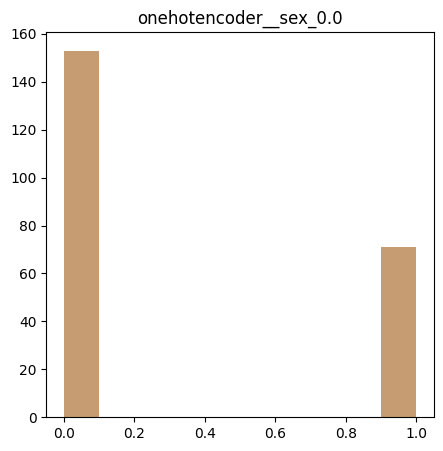

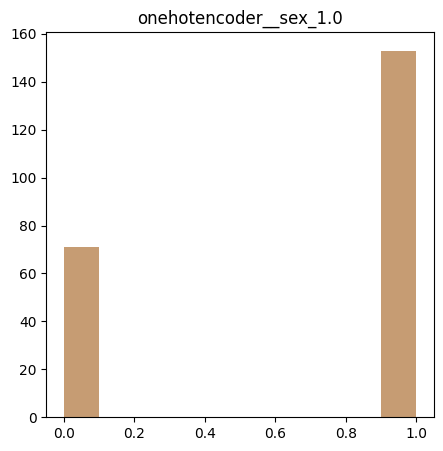

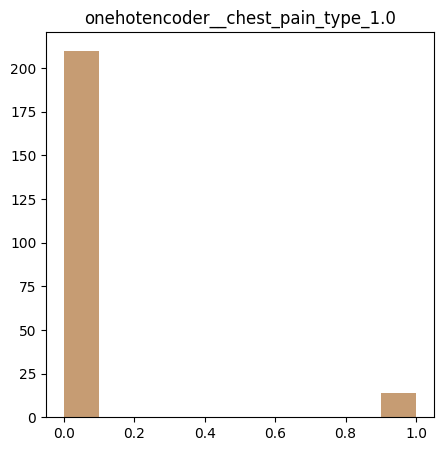

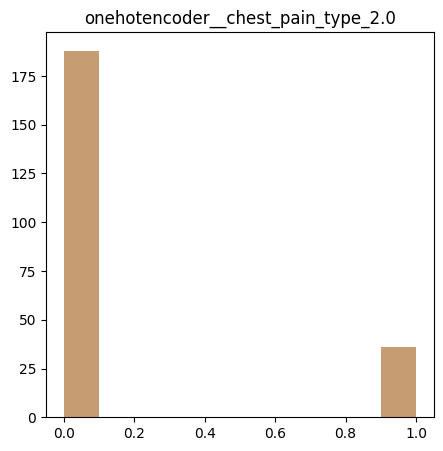

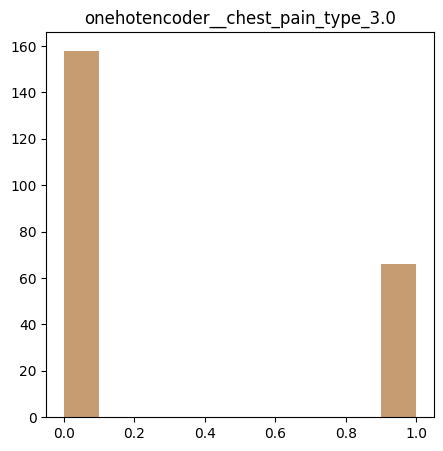

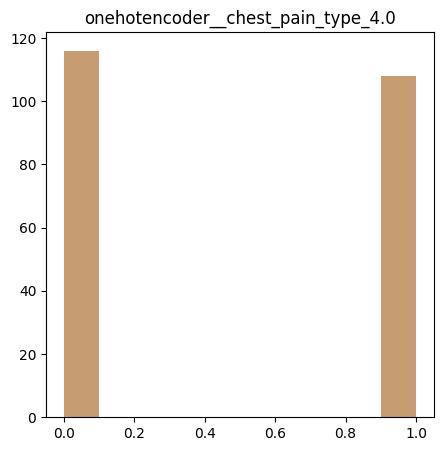

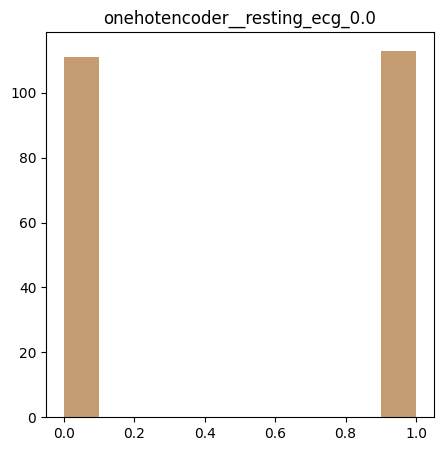

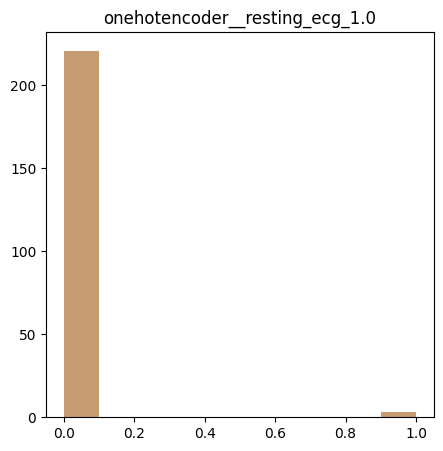

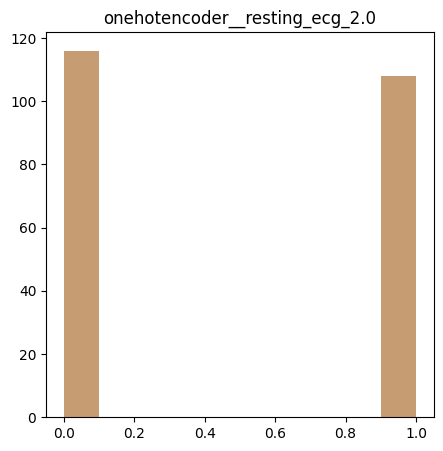

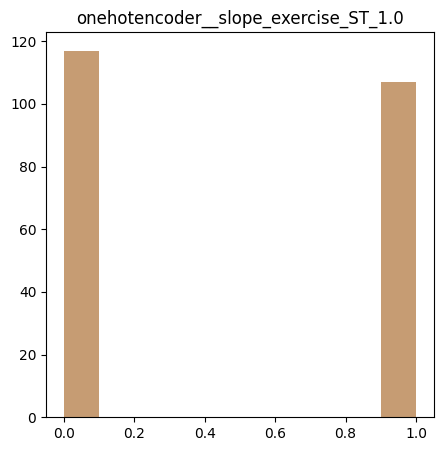

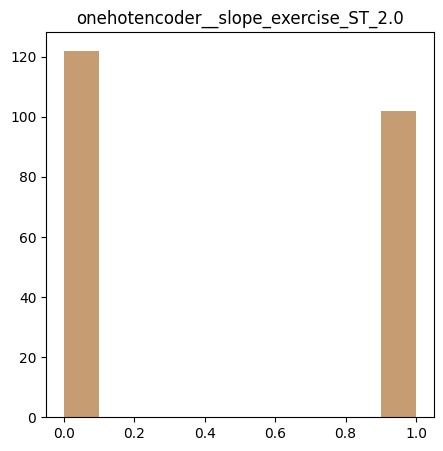

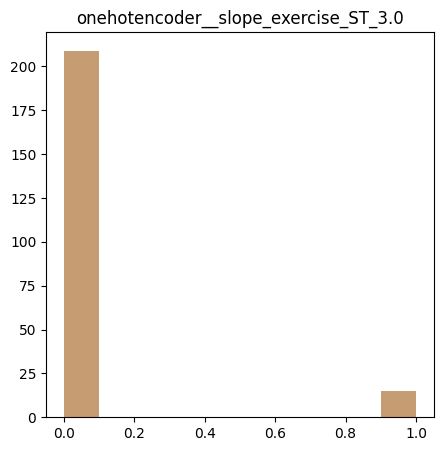

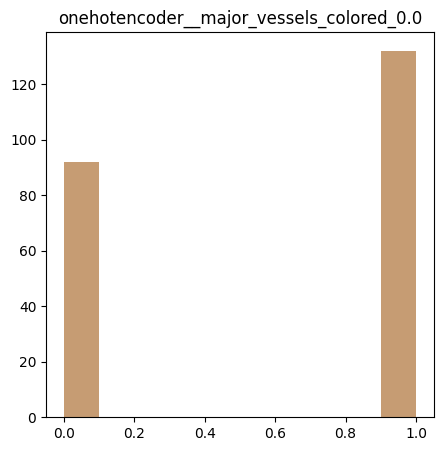

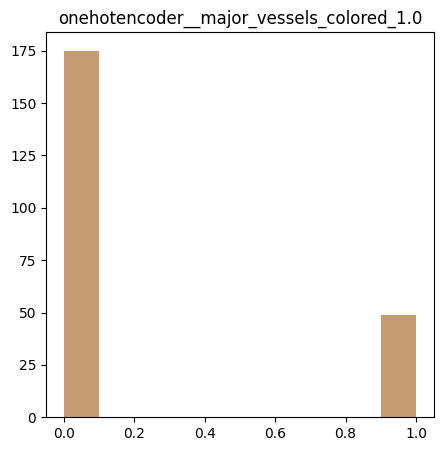

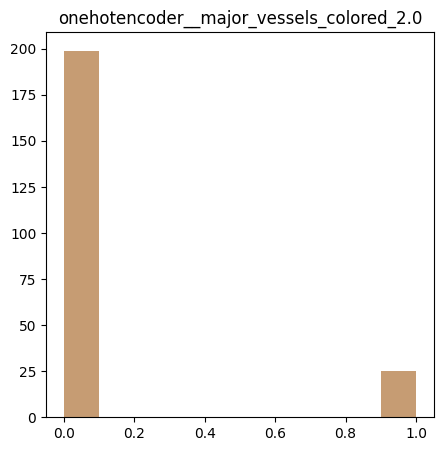

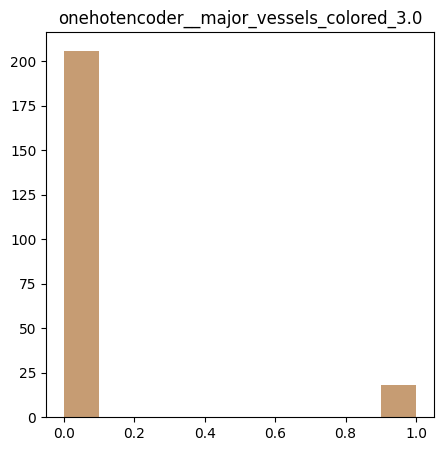

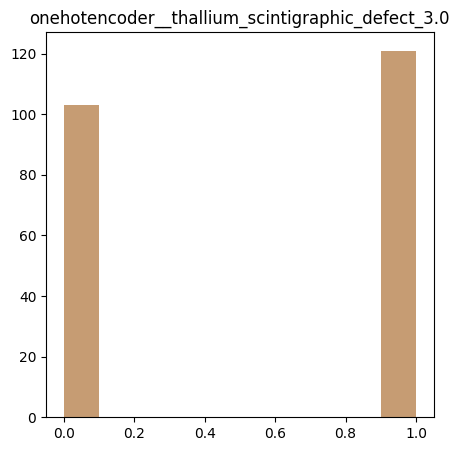

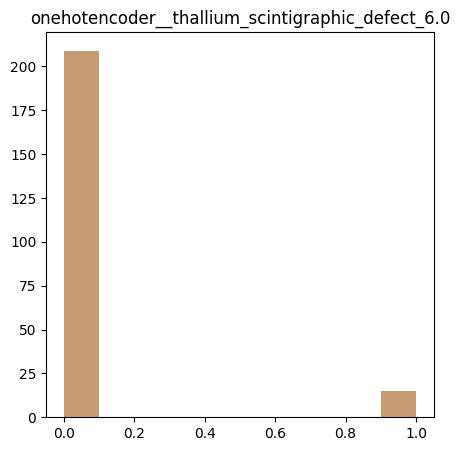

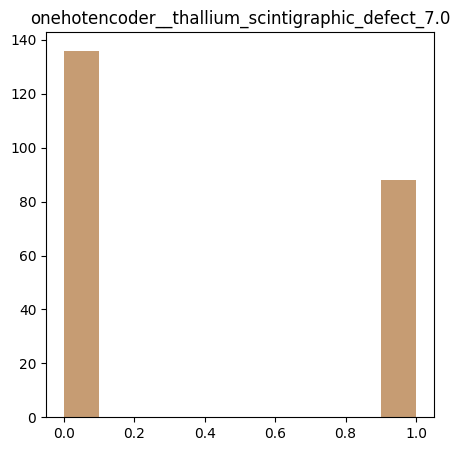

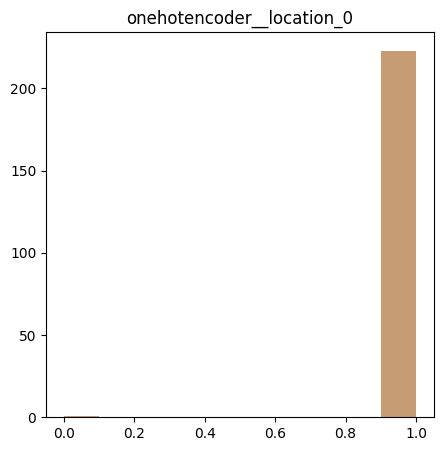

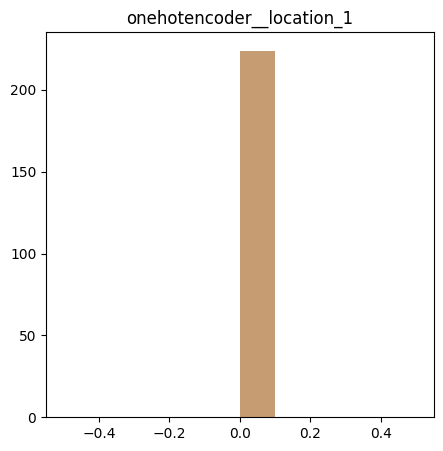

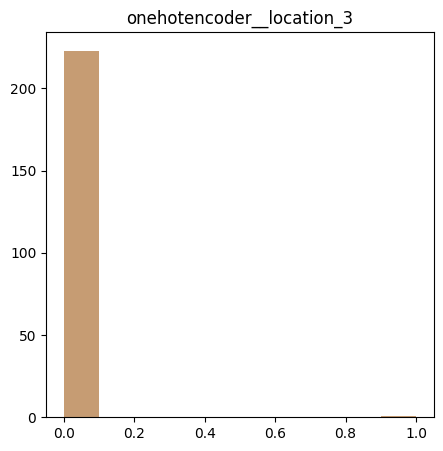

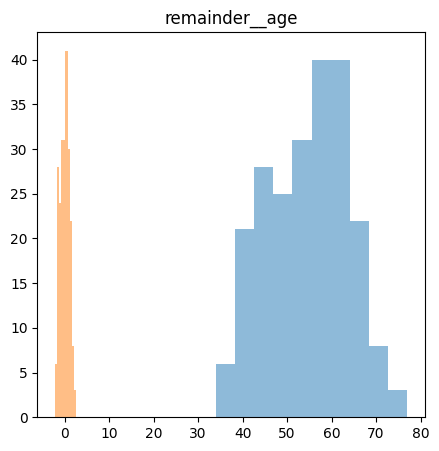

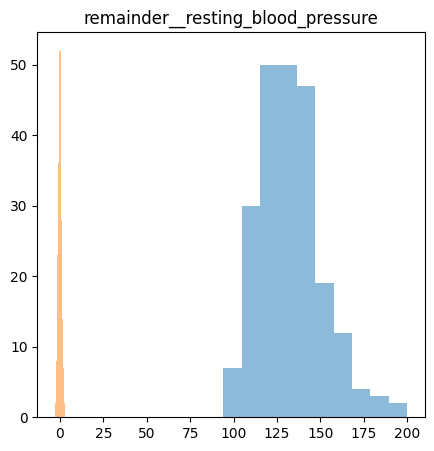

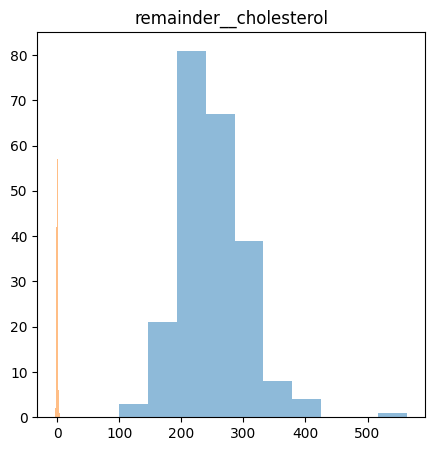

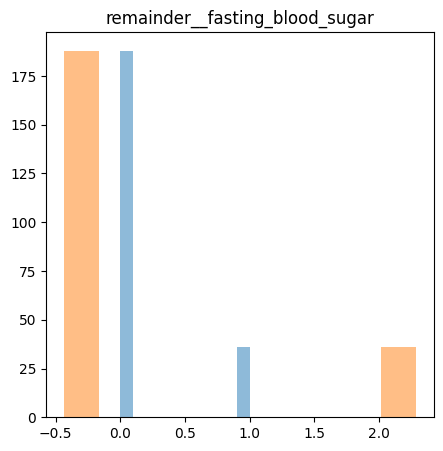

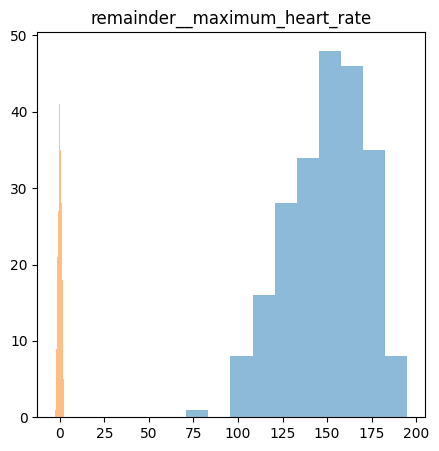

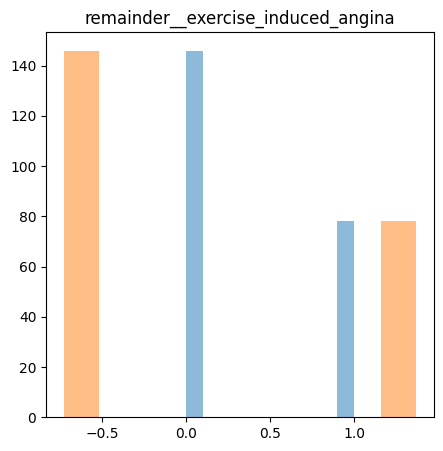

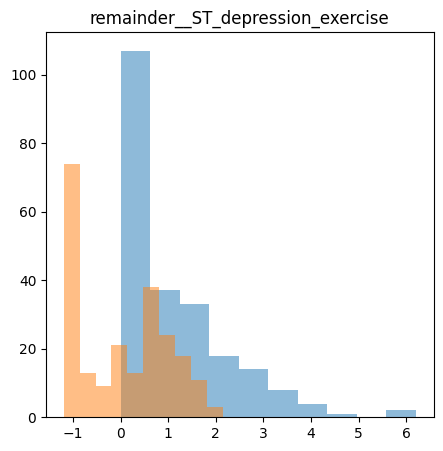

In [ ]:
# Set default figure size for plots
plt.rcParams['figure.figsize'] = [5, 5]

# Loop through column headers and create histograms for each column using X_train and X_train_scaled
for idx, x in enumerate(column_headers):
  plt.figure()
  plt.title(x)
  plt.hist(X_train[:,idx], alpha=0.5)
  plt.hist(X_train_scaled[:,idx], alpha=0.5)


In [ ]:
# Instantiate a StandardScaler object
tf=StandardScaler()

# Select columns of interest from X_train and X_test
X_train_to_pt=X_train[:,[0,3,4,7,9]]
X_test_to_pt=X_test[:,[0,3,4,7,9]]

# Fit the StandardScaler object to X_train_to_pt
tf.fit(X_train_to_pt)

# Transform X_train_to_pt and X_test_to_pt using the fitted StandardScaler object
X_train_to_pt=tf.transform(X_train_to_pt)
X_test_to_pt=tf.transform(X_test_to_pt)

# Replace columns of interest in X_train_scaled and X_test_scaled with transformed values
X_train_scaled[:,[0,3,4,7,9]]=X_train_to_pt
X_test_scaled[:,[0,3,4,7,9]]=X_test_to_pt

# Instantiate a logistic regression model with solver='liblinear', fit it to X_train_scaled and y_train
logreg = LogisticRegression( solver='liblinear').fit(X_train_scaled, y_train_mc)

# Print training set score and test set score
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_mc)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_mc)))


Training set score: 0.692
Test set score: 0.547


In [ ]:
# Fit a transformer object to X_train
tf.fit(X_train)

StandardScaler()

In [ ]:
# Transform X_train and X_test using the fitted transformer object
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a logistic regression model with solver='liblinear' to X_train_scaled and y_train
logreg = LogisticRegression( solver='liblinear').fit(X_train_scaled, y_train_mc)

# Print training set score and test set score
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_mc)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_mc)))


Training set score: 0.692
Test set score: 0.547


ValueError: ignored

In [ ]:
# Instantiate a PowerTransformer object
pt = PowerTransformer()

# Select columns of interest from X_train and X_test
X_train_to_pt=X_train[:,[0,3,4,7,9]]
X_test_to_pt=X_test[:,[0,3,4,7,9]]

# Fit the PowerTransformer object to X_train_to_pt
pt.fit(X_train_to_pt)

# Transform X_train_to_pt and X_test_to_pt using the fitted PowerTransformer object
X_train_to_pt=pt.transform(X_train_to_pt)
X_test_to_pt=pt.transform(X_test_to_pt)

# Replace columns of interest in X_train_scaled and X_test_scaled with transformed values
X_train_scaled[:,[0,3,4,7,9]]=X_train_to_pt
X_test_scaled[:,[0,3,4,7,9]]=X_test_to_pt


# Fit and train logistic regression model with scaled training data using liblinear solver
logreg = LogisticRegression(solver='liblinear').fit(X_train_scaled, y_train_mc)
# Print training set score
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_mc)))
# Print test set score
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_mc)))


In [ ]:
# Initialize and fit MinMaxScaler on training data
scaler = MinMaxScaler()
scaler.fit(X_train)
# Scale training data using MinMaxScaler
X_train_scaled = scaler.transform(X_train)
# Scale test data using MinMaxScaler
X_test_scaled = scaler.transform(X_test)
# Fit and train logistic regression model with scaled training data using liblinear solver
logreg = LogisticRegression(solver='liblinear').fit(X_train_scaled, y_train_mc)
# Print training set score
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_mc)))
# Print test set score
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_mc)))


In [ ]:
# Initialize and fit RobustScaler on training data
scaler = RobustScaler()
scaler.fit(X_train)
# Scale training data using RobustScaler
X_train_scaled = scaler.transform(X_train)
# Scale test data using RobustScaler
X_test_scaled = scaler.transform(X_test)
# Fit and train logistic regression model with scaled training data using liblinear solver
logreg = LogisticRegression(solver='liblinear').fit(X_train_scaled, y_train_mc)
# Print training set score
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_mc)))
# Print test set score
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_mc)))


In [ ]:
# Create pairplot using seaborn on specified columns of X_train
sns.pairplot(pd.DataFrame(X_train[:, [0, 3, 4, 7, 9]]))


In [ ]:
# Create pairplot using seaborn on X_train_to_pt
sns.pairplot(pd.DataFrame(X_train_to_pt))